In [1]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gas = ct.Solution('gri30.yaml')

In [6]:
# See what species are in the mechanism
for i in range(len(gas.species_names)):
    print(i, gas.species_names[i])

0 H2
1 H
2 O
3 O2
4 OH
5 H2O
6 HO2
7 H2O2
8 C
9 CH
10 CH2
11 CH2(S)
12 CH3
13 CH4
14 CO
15 CO2
16 HCO
17 CH2O
18 CH2OH
19 CH3O
20 CH3OH
21 C2H
22 C2H2
23 C2H3
24 C2H4
25 C2H5
26 C2H6
27 HCCO
28 CH2CO
29 HCCOH
30 N
31 NH
32 NH2
33 NH3
34 NNH
35 NO
36 NO2
37 N2O
38 HNO
39 CN
40 HCN
41 H2CN
42 HCNN
43 HCNO
44 HOCN
45 HNCO
46 NCO
47 N2
48 AR
49 C3H7
50 C3H8
51 CH2CHO
52 CH3CHO


In [48]:
# Set the initial conditions for the reactor
T_initial = 1000.0  # K
P_initial = 101325  # Pa
X_initial = 'CH4: 0.2, O2: 0.5, AR:0.3'
t = 0  # initial time


CH4_index = gas.species_names.index('CH4')
O2_index = gas.species_names.index('O2')
CO2_index = gas.species_names.index('CO2')

gas.TPX = T_initial, P_initial, X_initial

times = [t]
Ts = [gas.T]
Ps = [gas.P]
Xs = [gas.X]  # all concentrations
X_CH4s = [gas.X[CH4_index]]
X_O2s = [gas.X[O2_index]]
X_CO2s = [gas.X[CO2_index]]

# set up the reactor network and the simulator
reactor = ct.IdealGasReactor(gas)
sim = ct.ReactorNet([reactor])

t_end = 1.0  # seconds
while sim.time < t_end:
    sim.step()
    times.append(sim.time)
    Ts.append(gas.T)
    Ps.append(gas.P)
    Xs.append(gas.X)

    # save individual concentrations if matrices are hard to deal with
    X_CH4s.append(gas.X[CH4_index])
    X_O2s.append(gas.X[O2_index])
    X_CO2s.append(gas.X[CO2_index])
    


Text(0.5, 0, 'Time (s)')

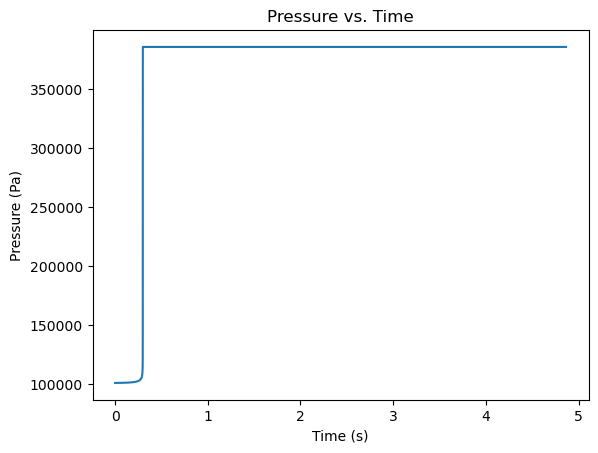

In [49]:
# plot the results
plt.plot(times, Ps)
plt.title('Pressure vs. Time')
plt.ylabel('Pressure (Pa)')
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

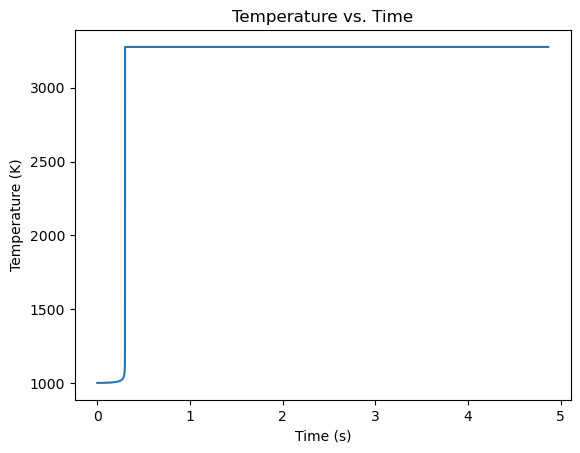

In [50]:
# plot the results
plt.plot(times, Ts)
plt.title('Temperature vs. Time')
plt.ylabel('Temperature (K)')
plt.xlabel('Time (s)')

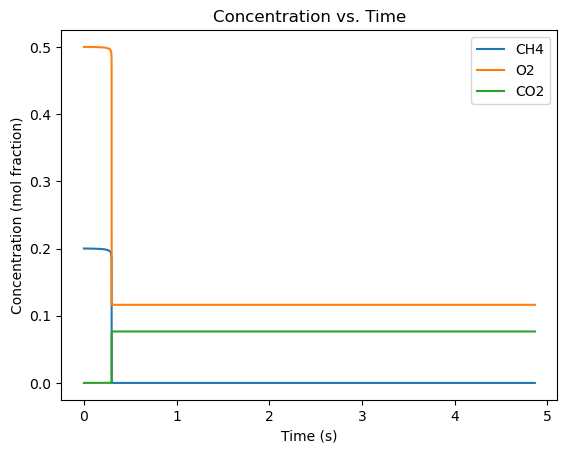

In [51]:
# Plot concentrations

plt.plot(times, X_CH4s, label='CH4')
plt.plot(times, X_O2s, label='O2')
plt.plot(times, X_CO2s, label='CO2')
plt.title('Concentration vs. Time')
plt.ylabel('Concentration (mol fraction)')
plt.xlabel('Time (s)')
plt.legend()